# 1. Analyse des données socio-économiques

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from gapminder import gapminder

### 1) 

Commencez par importer le module gapminder avec pip. Une fois installé ce module, vous aurez accès à un dataframe appelé gapminder.

Utilisez les méthodes head(), describe() et info() pour vous familiariser.

In [23]:
gapminder.head(13)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [9]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [10]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


### 2)
Utilisez la commande pandas.DataFrame.hist(gapminder) pour vous faire une idée plus précise des valeurs dans la base de données.

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'lifeExp'}>],
       [<AxesSubplot:title={'center':'pop'}>,
        <AxesSubplot:title={'center':'gdpPercap'}>]], dtype=object)

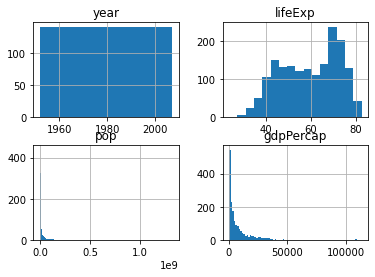

In [30]:
pd.DataFrame.hist(gapminder, bins='auto')

### Q1. Que pouvez-vous conclure à partir de ces histogrammes ?

Certains histogrammes sont peu pertinents en l'état à cause de l'échelle. Par exemple, l'histogramme de l'année est peu intuitif si nous ne réglons pas le nombre de bins en auto. Une fois la modification faite, on se rend alors compte que les données sont distribuées de manière égale par rapport aux années.

Pour les histogrammes de la population et du PIB per capita, les valeurs aux extrêmes sont trop éloignées pour avoir une bonne compréhension globable des données à l'observation des graphiques.

L'histogramme de l'espérance est quant à lui plutôt représentatif.

### 3) 

Trouvez combien d’observations il y a par pays (c.a.d., combien de données par
année par pays) et vérifiez s’il y a des données manquantes.

In [13]:
observations_by_country = len(gapminder.loc[gapminder['country'] == 'Afghanistan'])
nb_countries = gapminder['country'].nunique()
total_observations = len(gapminder['country'])

is_missing_value = nb_countries * observations_by_country != total_observations

# print(nbCountries)

if is_missing_value:
    print("Il manque des données.")
else:
    print("Il ne manque aucune donnée.")


Il ne manque aucune donnée.


### 4) 
Listez les valeurs uniques présentes dans les colonnes ‘continent’, ‘country’, et ‘year’. p.ex. utilisez la méthode unique().

In [44]:
gapminder['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [53]:
gapminder['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [54]:
gapminder['year'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

### 5) 

Calculez la moyenne de l’espérance de vie de tous les pays en 1952 et en 2007.

Générez un bar chart permettant la comparaison de ces moyennes.

Text(0, 0.5, 'Life Expectancy')

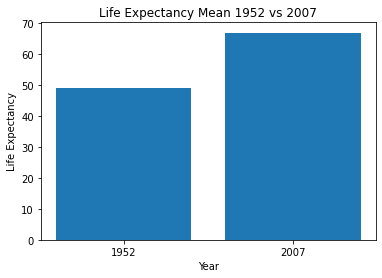

In [14]:
life_exp_mean = gapminder.groupby('year')['lifeExp'].mean()
year = np.array([1952, 2007])
life_exp = life_exp_mean[year]

x = np.arange(len(year))
plt.bar(x, life_exp)
plt.xticks(x, year)
plt.title('Life Expectancy Mean 1952 vs 2007')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')

### 6) 
Calculez la moyenne de l’espérance de vie des pays par continent en 1952 et en 2007.

Générez un bar chart permettant la comparaison de ces moyennes.

In [41]:
gapminder.where(gapminder.year == 2007).groupby('continent')['lifeExp'].mean()

continent
Africa      54.806038
Americas    73.608120
Asia        70.728485
Europe      77.648600
Oceania     80.719500
Name: lifeExp, dtype: float64

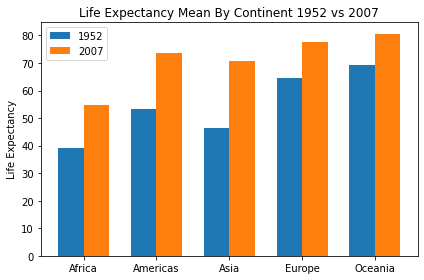

In [6]:
labels = gapminder['continent'].unique()
labels = np.sort(labels)
year_1952_means = gapminder.where(gapminder.year == 1952).groupby('continent')['lifeExp'].mean()
year_2007_means = gapminder.where(gapminder.year == 2007).groupby('continent')['lifeExp'].mean()

x = np.arange(len(labels))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, year_1952_means, width, label='1952')
rects2 = ax.bar(x + width/2, year_2007_means, width, label='2007')

ax.set_ylabel('Life Expectancy')
ax.set_title('Life Expectancy Mean By Continent 1952 vs 2007')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

In [87]:
print("Augmentation en années")
print(year_2007_means - year_1952_means)

print("\n\nAugmentation en %")
diff = 100 - (100 * year_1952_means / year_2007_means)
print(diff)

Augmentation en années
continent
Africa      15.670538
Americas    20.328280
Asia        24.414091
Europe      13.240100
Oceania     11.464500
Name: lifeExp, dtype: float64


Augmentation en %
continent
Africa      28.592722
Americas    27.616899
Asia        34.518046
Europe      17.051305
Oceania     14.202888
Name: lifeExp, dtype: float64


### Q2. Quel continent a eu la plus grande progression ?

Il s'agit de l'Asie, avec une augmentation de plus de 34.5% ou environ 24 ans.

### 7)
Générez un plot montrant l’évolution de 1952 à 2007 de la moyenne de la population par continent.


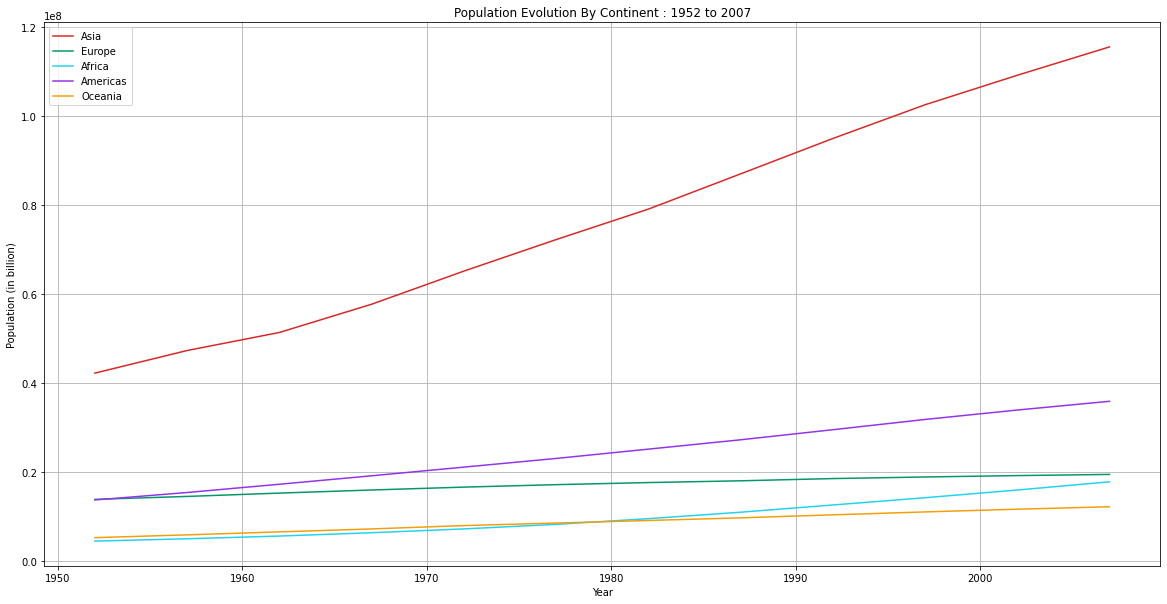

In [55]:
continents = gapminder['continent'].unique()
years = gapminder['year'].unique()
pop_mean_by_year = [gapminder.where(gapminder.continent == continent).groupby('year')['pop'].mean() for continent in continents]

plt.figure(figsize=(20, 10))
plt.title('Population Evolution By Continent : 1952 to 2007')
plt.xlabel('Year')
plt.ylabel('Population (in billion)')

colors = ['#DC2626', '#059669', '#22D3EE', '#9333EA', '#F59E0B']
for i in range(len(continents)):
     plt.plot(years, pop_mean_by_year[i], colors[i],label=continents[i])       

plt.legend(loc='upper left')
plt.grid()


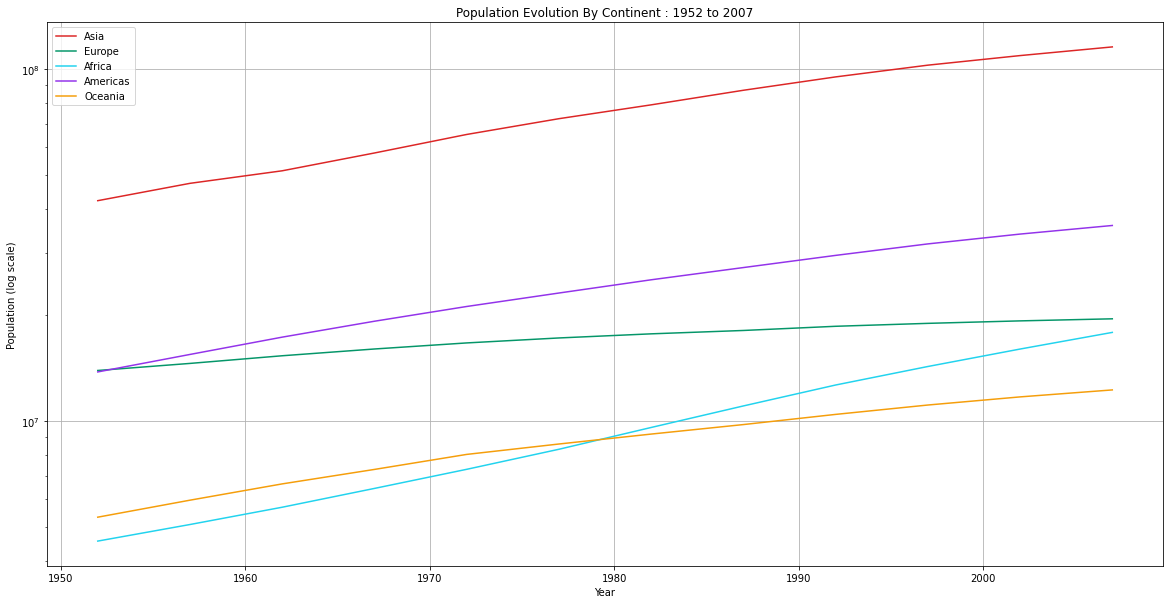

In [54]:
continents = gapminder['continent'].unique()
years = gapminder['year'].unique()
pop_mean_by_year = [gapminder.where(gapminder.continent == continent).groupby('year')['pop'].mean() for continent in continents]

plt.figure(figsize=(20, 10))
plt.title('Population Evolution By Continent : 1952 to 2007')
plt.xlabel('Year')
plt.ylabel('Population (log scale)')
plt.yscale('log')

colors = ['#DC2626', '#059669', '#22D3EE', '#9333EA', '#F59E0B']
for i in range(len(continents)):
     plt.plot(years, pop_mean_by_year[i], colors[i],label=continents[i])       

plt.legend(loc='upper left')
plt.grid()

### Q3. Que pouvez-vous conclure à partir de ces plots ?

Comme attendu, la croissance démographique en Asie peut être observée facilement sur les graphiques. Cette dernière a surtout été menée par le développement de la Chine et de l'Inde dans la seconde partie du 20ème siècle. On observe également une croissance de la population en Afrique à partir des années 1990. En Afrique, la natalité est toujours très élevée. On s'attend alors à ce que la progression actuelle continue. De nombreuses personnes pensent même qu'il s'agira du continent le plus peuplé dans les prochaines décennies. Pour l'Europe et l'Océanie, on observe une stagnation due au fait d'une natalité moins élevée.

### 8)
Générez deux sub-plots contenant un scatter plot avec l’espérance de vie des pays sur l’axe y et le PIB per capita sur l’axe x, pour l’année 1952 et séparément pour l’année 2007. Indiquez le continent par une couleur.

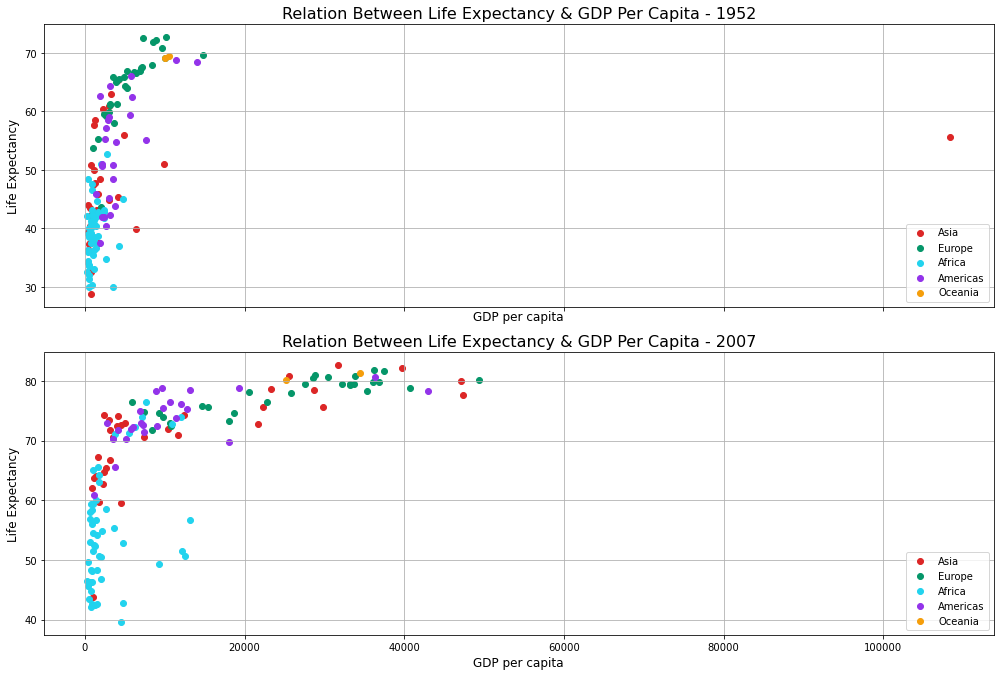

In [49]:
continents = gapminder['continent'].unique()

country_1952_per_continent = [gapminder.where(gapminder.continent == continent).where(gapminder.year == 1952).groupby('country').mean() for continent in continents]
country_2007_per_continent = [gapminder.where(gapminder.continent == continent).where(gapminder.year == 2007).groupby('country').mean() for continent in continents]

colors = ['#DC2626', '#059669', '#22D3EE', '#9333EA', '#F59E0B']

fig, axs = plt.subplots(2, figsize=(14, 10), sharex=True)

# Plot 1952
for i in range(len(continents)):
     axs[0].scatter(country_1952_per_continent[i]['gdpPercap'], country_1952_per_continent[i]['lifeExp'], c=colors[i], label=continents[i])
axs[0].set_title('Relation Between Life Expectancy & GDP Per Capita - 1952', fontsize=16)
axs[0].set_xlabel('GDP per capita', fontsize=12)
axs[0].set_ylabel('Life Expectancy', fontsize=12)
axs[0].legend(loc='lower right')
axs[0].grid()

# Plot 2007
for i in range(len(continents)):
    axs[1].scatter(country_2007_per_continent[i]['gdpPercap'], country_2007_per_continent[i]['lifeExp'], c=colors[i], label=continents[i])
axs[1].set_title('Relation Between Life Expectancy & GDP Per Capita - 2007', fontsize=16)
axs[1].set_xlabel('GDP per capita', fontsize=12)
axs[1].set_ylabel('Life Expectancy', fontsize=12)
axs[1].legend(loc='lower right')
axs[1].grid()

fig.tight_layout(rect=[0, 0.03, 1, 0.98])

In [25]:
gdp_per_cap_1952 = np.max(gapminder.where(gapminder.year == 1952)['gdpPercap'])
richest_country = gapminder.loc[gapminder['gdpPercap'] == gdp_per_cap_1952]
print(richest_country)

    country continent  year  lifeExp     pop    gdpPercap
852  Kuwait      Asia  1952   55.565  160000  108382.3529


### Q4. Que pouvez-vous conclure à partir de ces scatter plots ?

On peut voir une évolution rapide du PIB per capita entre 1952 et 2007 comparé à l'espérance de vie qui a augmenté de manière moins prononcée. Cette évolution n'est pas forcément reflétée sur tous les continents. On voit notamment qu'il s'agit de l'Europe et de l'Asie qui ont eu une progression significative.
Pour les pays avec une espérance de vie basse (moins de 60 ans), on observe que le PIB per capita n'est jamais très élevé. Tandis que pour les pays avec une espérance de vie de plus de 70 ans, il y a une grosse variation de richesse. On peut supposer qu'à partir de ce point-là, l'écart de richesse est moins influencé par l'espérance de vie.

Remarque intéressante, en 1952, le Kuwait avait un PIB per capita de 108'000$. Cette valeur est pour le coup très élevée si on prend en compte l'inflation mais pourrait s'expliquer par la très faible population de l'époque. Cette valeur extrême casse un peu l'échelle du graphique.

### 9)
La fonction scatter de matplotlib permet non seulement d’indiquer une couleur mais aussi la taille de chaque « point ». Générez des scatter plots de l’espérance de vie vs. PIB par habitant (années 1952 et 2007) et visualisez la population associée à chaque pays à l’aide d’un cercle de taille proportionnel à la
population.

Indiquez le continent par une couleur.

Aide : ```plt.scatter(x, y, s=taille, facecolors='none', edgecolors='r')```

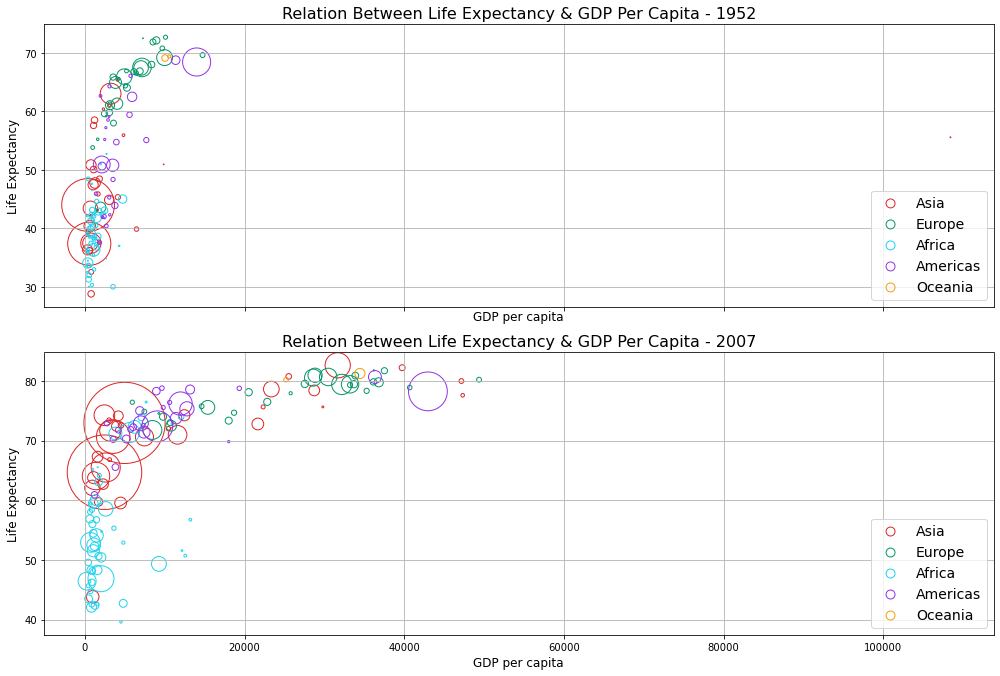

In [50]:
continents = gapminder['continent'].unique()

country_1952_per_continent = [gapminder.where(gapminder.continent == continent).where(gapminder.year == 1952).groupby('country').mean() for continent in continents]
country_2007_per_continent = [gapminder.where(gapminder.continent == continent).where(gapminder.year == 2007).groupby('country').mean() for continent in continents]

colors = ['#DC2626', '#059669', '#22D3EE', '#9333EA', '#F59E0B']

fig, axs = plt.subplots(2, figsize=(14, 10), sharex=True)
# Plot 1952
for i in range(len(continents)):
     axs[0].scatter(country_1952_per_continent[i]['gdpPercap'], country_1952_per_continent[i]['lifeExp'], s=(country_1952_per_continent[i]['pop'] / 200000), facecolors='none', edgecolors=colors[i], label=continents[i])
axs[0].set_title('Relation Between Life Expectancy & GDP Per Capita - 1952', fontsize=16)
axs[0].set_xlabel('GDP per capita', fontsize=12)
axs[0].set_ylabel('Life Expectancy', fontsize=12)
lgnd = axs[0].legend(loc="lower right", scatterpoints=1, fontsize=14)
for i in range(len(continents)):
    lgnd.legendHandles[i]._sizes = [80]
axs[0].grid()

# Plot 2007
for i in range(len(continents)):
    axs[1].scatter(country_2007_per_continent[i]['gdpPercap'], country_2007_per_continent[i]['lifeExp'], s=(country_2007_per_continent[i]['pop'] / 200000), facecolors='none', edgecolors=colors[i], label=continents[i])
axs[1].set_title('Relation Between Life Expectancy & GDP Per Capita - 2007', fontsize=16)
axs[1].set_xlabel('GDP per capita', fontsize=12)
axs[1].set_ylabel('Life Expectancy', fontsize=12)
axs[1].legend(loc='lower right')
lgnd = axs[1].legend(loc="lower right", scatterpoints=1, fontsize=14)
for i in range(len(continents)):
    lgnd.legendHandles[i]._sizes = [80]
axs[1].grid()

fig.tight_layout(rect=[0, 0.03, 1, 0.98])

### 10)
Générez un scatter plot montrant l’augmentation de la population entre 1952 et 2007 (axe y) par rapport au PIB per capita. Indiquez le continent par une couleur.

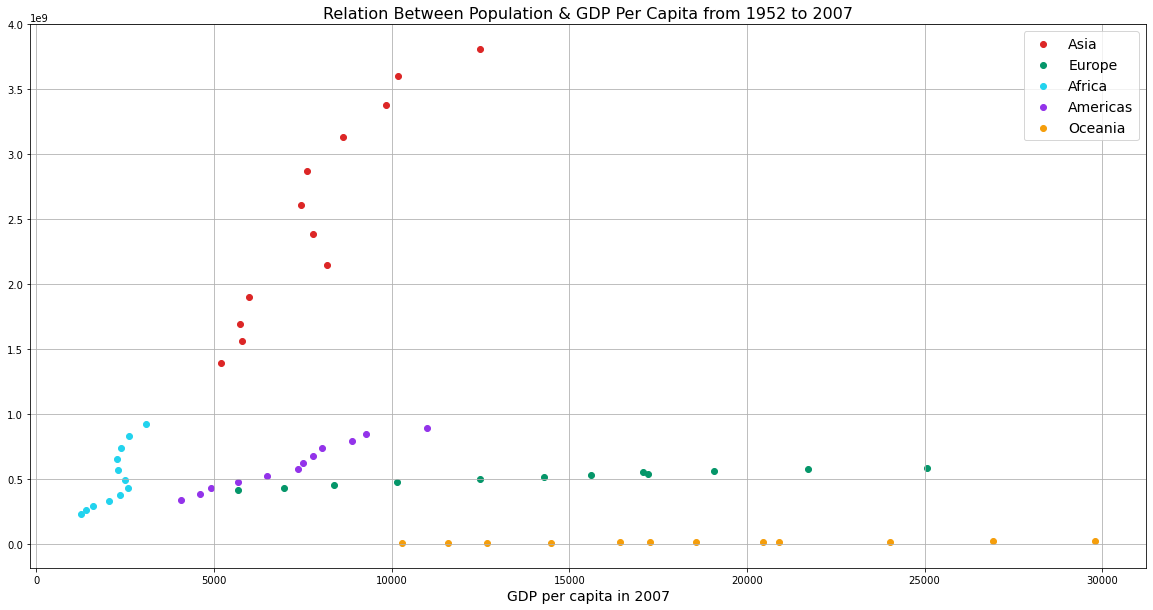

In [52]:
continents = gapminder['continent'].unique()
mean_continents_data_per_year = gapminder.groupby(['continent', 'year']).mean()
sum_continents_data_per_year = gapminder.groupby(['continent', 'year']).sum()

colors = ['#DC2626', '#059669', '#22D3EE', '#9333EA', '#F59E0B']

plt.figure(figsize=(20, 10))
for i in range(len(continents)):
    plt.scatter(mean_continents_data_per_year['gdpPercap'][continents[i]], sum_continents_data_per_year['pop'][continents[i]], c=colors[i], label=continents[i])
plt.title('Relation Between Population & GDP Per Capita from 1952 to 2007', fontsize=16)
plt.xlabel('GDP per capita in 2007', fontsize=14)
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=14)
plt.grid()


### Q5. Que pouvez-vous observer dans cette figure et que pouvez-vous conclure ?


On observe que les continents avec une croissance de la population importante augmentent leur PIB per capita plus lentement. On peut expliquer cette observation par le fait que si le PIB d'un pays augmente ainsi que sa population, le PIB per capita augmente plus lentement.

Au contraire, si on prend en comptes les continents avec une majorité de pays développés (ex: l'Europe ou l'Océanie) qui proportionellement aux autres continents ont eu une évolution de la population bien plus lente, on observe que leurs PIB per capita ont une augmentation bien plus significative.
